###  BRIEF DESCRIPRION ABOUT THE USE CASE 
  It is known that the most popular cause of dealth globally is the Cardiovascular diseases (CVDs) also known as Heart Disease. With over 18m dealth annually. Given that, it is worth the effort and investing time to research and find ways to curb or reduce the mortality rate caused by CVDs. One of the ways to help is to proactively identify (predict)the patients who are likely to have the CVDs and prevent the disease at early stage. The factors that lead to heart disease such as age, sex, Resting

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
import numpy as np
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from datetime import date
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
print("Import Done!")

Import Done!


### Import Data

In [2]:
def read_flat_file(file):
    dfs = pd.read_csv(file)
    return dfs
data=read_flat_file('Heart_Disease_Prediction.csv')

In [3]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
data.shape

(270, 14)

####  All Observations and features

In [5]:
print("The total number observations",len(data))
print("The total features that come with the dataset",len(data.columns)-1)

The total number observations 270
The total features that come with the dataset 13


In [6]:
#The number of null values in each column i.e column means axis =0
data.isnull().sum(axis=0)

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
data['Heart Disease'].value_counts() #The distribution of the Heart Disease class that is target variable. If the data is not closely divided we would have applied SMOTE

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [8]:
data.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [9]:
#nunique = data.nunique()
#df = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] 

In [10]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

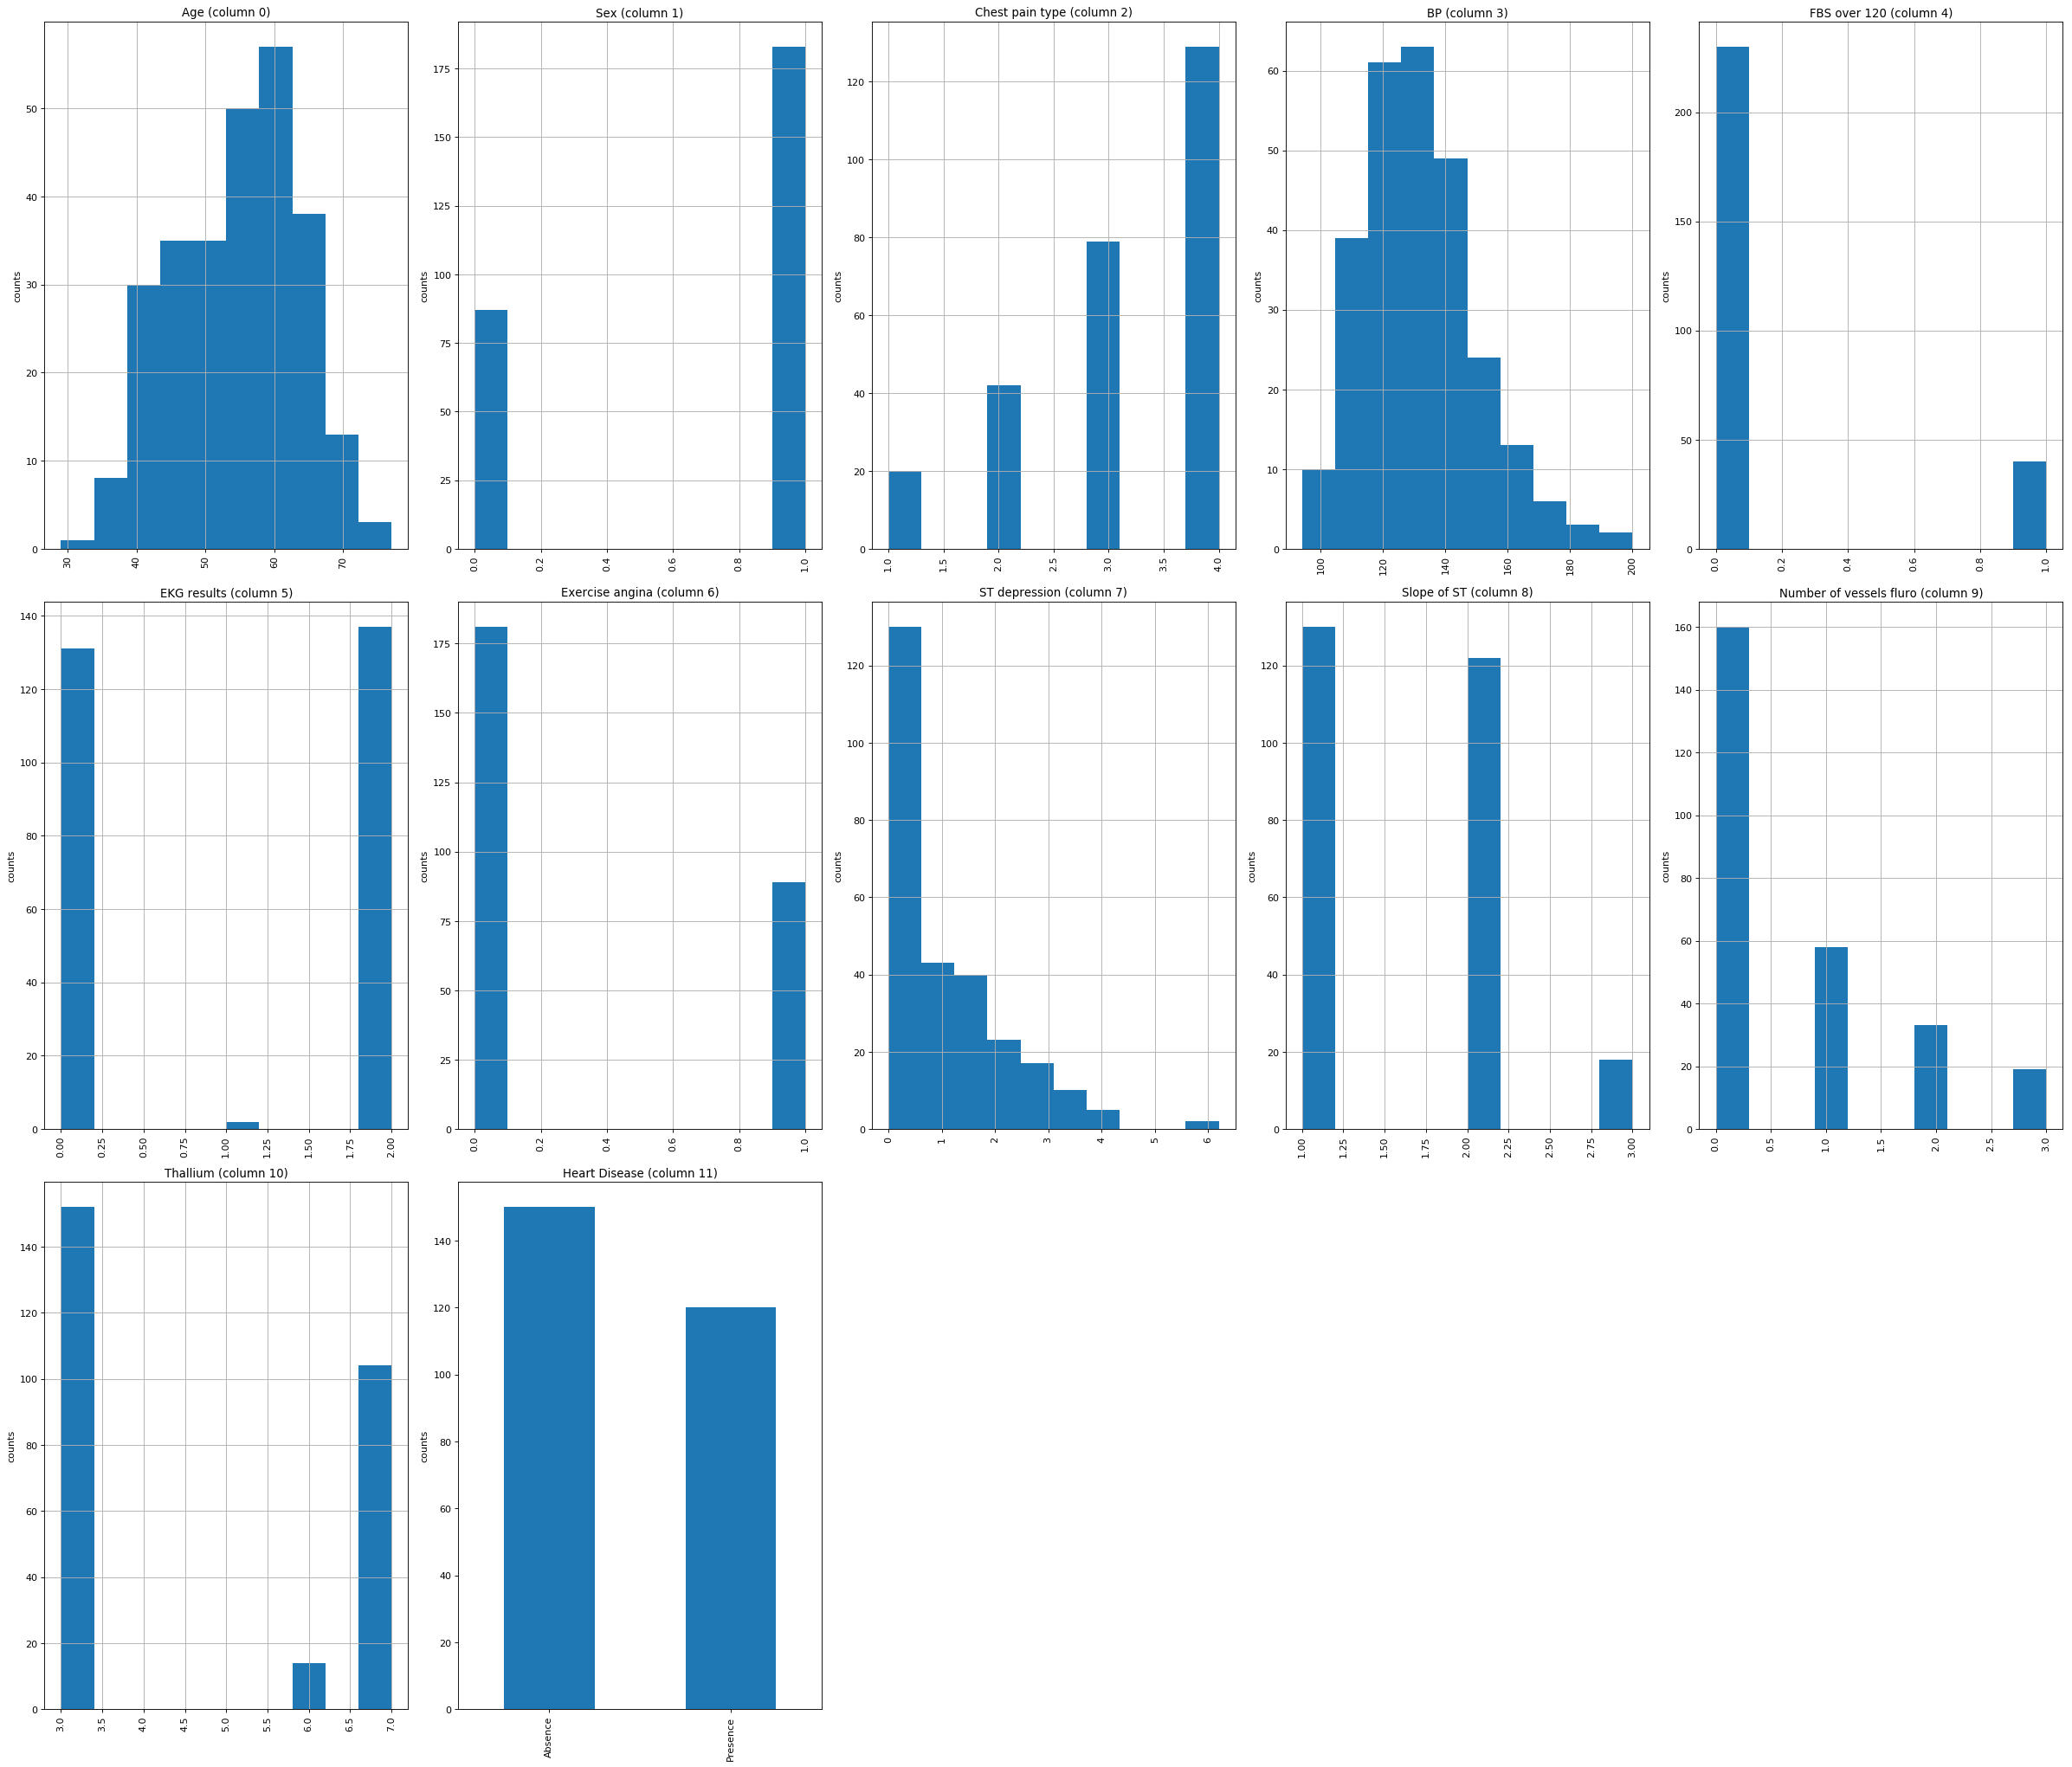

In [11]:
plotPerColumnDistribution(data, 13, 5)

### Data Cleaning 

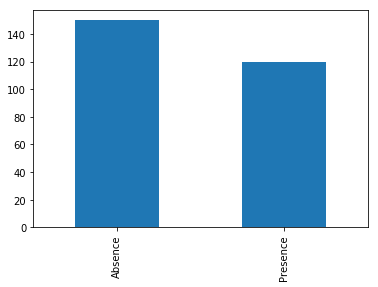

In [12]:
df2 = data['Heart Disease'].value_counts()
df2.plot(kind='bar')

In [13]:
data['Heart Disease']=data['Heart Disease'].replace(['Presence','Absence'],[1,0])

In [14]:
data.Age.value_counts().head()

54    16
58    15
51    12
57    12
59    12
Name: Age, dtype: int64

In [15]:
print("Maximum Age: ",data.Age.max())
print("Minimum Age:",data.Age.min())

Maximum Age:  77
Minimum Age: 29


In [16]:
#data['group_age'] = pd.cut(data['Age'], bins = [0,40,50,60,70,100], include_lowest = True, labels = ['0-40', '41-50','51-60','61-70','71 and above'])

In [17]:
#df2 = data['group_age'].value_counts()
# Fixed to show distribution of bin
#df2.plot(kind='bar')

### One hot encoding for the nominal features

In [18]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [19]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['Chest pain type', 'Slope of ST', 'Thallium']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL', 'TH'])))
    
    # Split df into X and y
    y = df['Heart Disease'].values
    X = df.drop('Heart Disease', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [20]:
X, y = preprocess_inputs(data, RobustScaler())

In [21]:
X.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,CP_1,CP_2,CP_3,CP_4,SL_1,SL_2,SL_3,TH_3,TH_6,TH_7
0,1.153846,0.0,0.00,1.149254,0.0,0.0,-1.348485,0.0,1.0000,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.923077,-1.0,-0.75,4.761194,0.0,0.0,0.196970,0.0,0.5000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0
2,0.153846,0.0,-0.30,0.238806,0.0,-1.0,-0.378788,0.0,-0.3125,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0
3,0.692308,0.0,-0.10,0.268657,0.0,-1.0,-1.469697,1.0,-0.3750,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0
4,1.461538,-1.0,-0.50,0.358209,0.0,0.0,-0.984848,1.0,-0.3750,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### FEEDFORWARD NEURAL NETWORK

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size 
    mse = ((predictions - labels)**2).sum() / (2*N)
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.round() == labels
    accuracy = predicions_correct.mean()
    return accuracy

In [24]:
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [25]:
learning_rate = 0.7
epochs = 18000,
n_input = 20,
n_hidden = 4,
n_output = 1
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(20,4))   # (24, 4) n_input, n_hidden
weights_2 = np.random.normal(scale=0.5, size=(4,1))  # n_hidden, n_output (4, 1)

In [26]:
N = y_train.size
monitoring = {"mean_squared_error": [], "accuracy": []}

def train(learning_rate, epochs,weights_1, weights_2):
    
    for epoch in range(18000):
        if(epoch==0):
            wc1,wc2 = 0.0,0.0

        # feedforward
        hidden_layer = sigmoid(np.dot(X_train, weights_1))        # (712, 4)
        output_layer = sigmoid(np.dot(hidden_layer, weights_2))   # (712, 1)

        # monitor training process
        acc = accuracy(output_layer, y_train)
        mse = mean_squared_error(output_layer, y_train)
        monitoring["accuracy"].append(acc)
        monitoring["mean_squared_error"].append(mse)

        # backpropagation
        output_layer_delta = (output_layer - y_train) * output_layer * (1 - output_layer)                 # (712, 1)
        hidden_layer_delta = np.dot(output_layer_delta, weights_2.T) * hidden_layer * (1 - hidden_layer)  # (712, 4)
        
        #Calculation with momentum
        # Weight changes(t-1)
        wc2_before = wc2 # (4, 1)
        wc1_before = wc1 # (24, 4)

        # Weight changes(t)
        wc2 = learning_rate * np.dot(hidden_layer.T, output_layer_delta)  / N # (4, 1)
        wc1 = learning_rate * np.dot(X_train.T, hidden_layer_delta)  / N # (24, 4)
        
        # weight updates
        weights_2 -= wc2 + wc2_before    
        weights_1 -= wc1 + wc1_before
             
        '''
        # Calulation without momentum
        # weight updates
        weights_2 -= (learning_rate * np.dot(hidden_layer.T, output_layer_delta)  / N)    
        weights_1 -= (learning_rate * np.dot(x_train.T, hidden_layer_delta)  / N)
        '''
        
        if(epoch%1000==0):
            print("Epoch {}/{} - Sum Squared Error({}), Accuracy({})".format(epoch+1,epochs,mse,acc))
                    
    print("Final Epoch {}/{} - Sum Squared Error({}), Accuracy({})".format(epoch+1,epochs,mse,acc))
        

train(learning_rate, epochs, weights_1, weights_2)

monitoring_df = pd.DataFrame(monitoring)

Epoch 1/(18000,) - Sum Squared Error(0.1698561475208504), Accuracy(0.35185185185185186)
Epoch 1001/(18000,) - Sum Squared Error(0.040850871306535363), Accuracy(0.9027777777777778)
Epoch 2001/(18000,) - Sum Squared Error(0.035880848614381), Accuracy(0.9166666666666666)
Epoch 3001/(18000,) - Sum Squared Error(0.030060654590067817), Accuracy(0.9444444444444444)
Epoch 4001/(18000,) - Sum Squared Error(0.024637129086933607), Accuracy(0.9583333333333334)
Epoch 5001/(18000,) - Sum Squared Error(0.0212337451481936), Accuracy(0.9675925925925926)
Epoch 6001/(18000,) - Sum Squared Error(0.019542125912861582), Accuracy(0.9675925925925926)
Epoch 7001/(18000,) - Sum Squared Error(0.01862110207134582), Accuracy(0.9675925925925926)
Epoch 8001/(18000,) - Sum Squared Error(0.018059461471634022), Accuracy(0.9675925925925926)
Epoch 9001/(18000,) - Sum Squared Error(0.017688613382476823), Accuracy(0.9675925925925926)
Epoch 10001/(18000,) - Sum Squared Error(0.01742906457427932), Accuracy(0.9675925925925926

In [27]:
#testdata

# feedforward
hidden_layer_inputs = np.dot(X_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [28]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8888888888888888


In [31]:
print('Accuracy:',acc)

Accuracy: 0.8888888888888888


#### DECISION TREE AND RANDOM FOREST

In [32]:
# Define a function which trains models
def models(X_train,y_train):
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)

  
  #print model accuracy on the training data.
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    
  
    return tree,forest
#get the training results
model = models(X_train,y_train)

[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953703703703703


In [33]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))

Logistic Regression Accuracy: 88.89%


In [34]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print()

[[23  7]
 [ 8 16]]
Model[0] Testing Accuracy = "0.7222222222222222"

[[27  3]
 [ 7 17]]
Model[1] Testing Accuracy = "0.8148148148148148"



In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    print('Model',i)
 #Check precision, recall, f1-score
    print(classification_report(y_test, model[i].predict(X_test)))
 #Another way to get the models accuracy on the test data
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

     Absence       0.74      0.77      0.75        30
    Presence       0.70      0.67      0.68        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54

0.7222222222222222

Model 1
              precision    recall  f1-score   support

     Absence       0.79      0.90      0.84        30
    Presence       0.85      0.71      0.77        24

    accuracy                           0.81        54
   macro avg       0.82      0.80      0.81        54
weighted avg       0.82      0.81      0.81        54

0.8148148148148148



In [36]:
forest=model[1]
feats = {}
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance

In [37]:
sorted_by_values= sorted(feats.items(), key=lambda x: (x[1],x[0]), reverse=True)

In [38]:
sorted_by_values

[('TH_7', 0.10933415263405595),
 ('Cholesterol', 0.10667086134587081),
 ('ST depression', 0.10507043089040627),
 ('Max HR', 0.10087847450256122),
 ('Number of vessels fluro', 0.09459063528230699),
 ('Age', 0.08628413276478357),
 ('BP', 0.06974148835172059),
 ('CP_4', 0.06708451674367763),
 ('Exercise angina', 0.03881818904800802),
 ('TH_3', 0.03719645445359472),
 ('SL_1', 0.0342679038305768),
 ('Sex', 0.030998715183284238),
 ('SL_2', 0.027913734322008478),
 ('EKG results', 0.027548387857447065),
 ('CP_1', 0.019818025062381766),
 ('CP_3', 0.016060321865694657),
 ('CP_2', 0.010559421967785145),
 ('FBS over 120', 0.009078401243522435),
 ('SL_3', 0.007349812792347156),
 ('TH_6', 0.0007359398579665286)]